In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()

In [2]:
des = pd.read_csv('destnosim_detections.csv')
oifpp = pd.read_csv('oifpp_detections.csv')
rubin = pd.read_csv('rubin_detections.csv')

In [3]:
des

,Unnamed: 0,ORBITID,CCDNUM,DEC,EXPNUM,RA,TDB,BAND,MJD,MAG,DETPROB,RANDOM
0,1,142,8,-14.070585,379993,19.151617,14.887589,g,56982.191010,25.047153,0.057767,0.871544
1,2,142,13,-13.826957,498221,19.216529,15.914059,i,57357.109121,23.442421,0.435596,0.551172
2,3,142,27,-13.781081,482409,19.575246,15.763699,i,57302.190430,23.442421,0.701440,0.808485
3,4,142,49,-13.540816,580905,19.698270,16.760290,i,57666.195193,23.442421,0.666623,0.001554
4,5,142,11,-13.527901,579053,19.733590,16.746650,i,57661.213129,23.442421,0.767556,0.844691
...,...,...,...,...,...,...,...,...,...,...,...,...
155,164,745,60,-51.083008,680482,-27.024478,17.726507,r,58019.105767,23.081061,0.896233,0.337121
156,165,745,30,-51.089628,358446,-27.539329,14.695758,z,56912.124750,22.531587,0.655792,0.857110
157,166,745,26,-50.910686,260782,-27.976852,13.928963,z,56632.052912,22.531587,0.573425,0.289038
158,167,745,60,-51.084003,676337,-26.945514,17.693774,z,58007.150208,22.531587,0.727831,0.466954


In [4]:
corr_des = des
neg_ra_mask = corr_des['RA'] < 0
#corr_des['RA'] = corr_des[neg_ra_mask]['RA'] + 360
#corr_des.loc[neg_ra_mask, 'RA'] = des['RA'] + 360
corr_des['RA'] = np.where(neg_ra_mask, corr_des['RA']+360, corr_des.RA)
des = corr_des
des

,Unnamed: 0,ORBITID,CCDNUM,DEC,EXPNUM,RA,TDB,BAND,MJD,MAG,DETPROB,RANDOM
0,1,142,8,-14.070585,379993,19.151617,14.887589,g,56982.191010,25.047153,0.057767,0.871544
1,2,142,13,-13.826957,498221,19.216529,15.914059,i,57357.109121,23.442421,0.435596,0.551172
2,3,142,27,-13.781081,482409,19.575246,15.763699,i,57302.190430,23.442421,0.701440,0.808485
3,4,142,49,-13.540816,580905,19.698270,16.760290,i,57666.195193,23.442421,0.666623,0.001554
4,5,142,11,-13.527901,579053,19.733590,16.746650,i,57661.213129,23.442421,0.767556,0.844691
...,...,...,...,...,...,...,...,...,...,...,...,...
155,164,745,60,-51.083008,680482,332.975522,17.726507,r,58019.105767,23.081061,0.896233,0.337121
156,165,745,30,-51.089628,358446,332.460671,14.695758,z,56912.124750,22.531587,0.655792,0.857110
157,166,745,26,-50.910686,260782,332.023148,13.928963,z,56632.052912,22.531587,0.573425,0.289038
158,167,745,60,-51.084003,676337,333.054486,17.693774,z,58007.150208,22.531587,0.727831,0.466954


In [5]:
true_detect_drop = des.sort_values('MAG', ascending=True).drop_duplicates('ORBITID', keep='first')

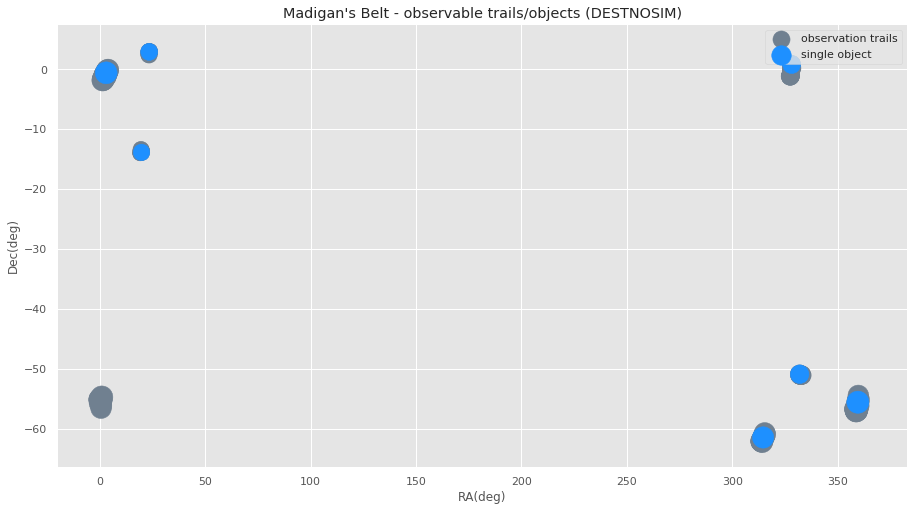

In [7]:
plt.style.use('ggplot')

fig, ax = plt.subplots(1,1)
fig.set_size_inches(12.8,7.2)
fig.tight_layout() 

size = ((26 - des['MAG']))*100
size_drop = ((26 - true_detect_drop['MAG']))*100
ax.set_xlabel('RA(deg)')
ax.set_ylabel('Dec(deg)')

ax.set_title("Madigan's Belt - observable trails/objects (DESTNOSIM)")

ax.scatter(des['RA'], des['DEC'], s=size, c='slategrey', label = 'observation trails')
ax.scatter(true_detect_drop['RA'], true_detect_drop['DEC'], s=size_drop, c='dodgerblue', label = 'single object')

plt.legend()

plt.tight_layout()
plt.savefig('destnosim_obs_obj_trails_new.png', bbox_inches='tight')

In [8]:
des['SIMULATION'] = 'DESTNOSIM'

In [9]:
size_des = ((26 - des['MAG']))*100

In [10]:
oifpp

,ObjID,FieldID,FieldMJD,AstRange(km),AstRangeRate(km/s),AstRA(deg),AstRARate(deg/day),AstDec(deg),AstDecRate(deg/day),Ast-Sun(J2000x)(km),...,MaginFilterTrue,AstrometricSigma(mas),PhotometricSigma(mag),SNR,AstrometricSigma(deg),MaginFilter,dmagDetect,AstRATrue(deg),AstDecTrue(deg),detectorID
0,745,417543.0,60611.181649,3.039592e+10,60.542328,11.867297,0.014142,-43.404711,0.008651,2.173310e+10,...,24.379417,80.424925,0.192412,5.157520,0.000022,24.067738,0.000137,11.867314,-43.404718,2.0
1,745,417510.0,60611.165011,3.039584e+10,60.508189,11.867049,0.014139,-43.404879,0.008645,2.173304e+10,...,24.853402,61.416092,0.166168,6.046730,0.000017,24.958266,0.000172,11.867079,-43.404861,3.0
2,236,200869.0,60199.044685,1.283443e+10,91.525180,289.527901,0.061410,1.997480,0.004823,4.435173e+09,...,24.045227,130.056362,0.217727,4.503396,0.000036,23.878255,0.001423,289.527809,1.997502,4.0
3,745,411115.0,60603.059345,3.035435e+10,57.857058,11.752608,0.013956,-43.472646,0.008078,2.169938e+10,...,24.846342,96.412685,0.209167,4.706814,0.000027,24.582362,0.000106,11.752636,-43.472688,4.0
4,745,411116.0,60603.059762,3.035435e+10,57.857837,11.752647,0.013956,-43.472636,0.008078,2.169938e+10,...,24.846342,106.660061,0.219335,4.466953,0.000030,24.617424,0.000096,11.752642,-43.472685,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,745,229144.0,60260.082385,2.923109e+10,53.980591,4.121055,0.018948,-46.204443,0.009276,2.027516e+10,...,24.213398,88.190458,0.187937,5.291554,0.000024,23.932558,0.000154,4.121077,-46.204428,181.0
225,745,417537.0,60611.178878,3.039591e+10,60.536708,11.867232,0.014141,-43.404735,0.008650,2.173309e+10,...,24.379414,84.137579,0.197062,5.024724,0.000023,24.282245,0.000131,11.867275,-43.404741,182.0
226,111,92301.0,59997.252776,1.417681e+10,139.760621,148.113724,0.033405,15.997988,-0.032093,-1.170319e+10,...,23.736753,109.453442,0.192331,5.159905,0.000030,23.616490,0.000835,148.113718,15.998002,183.0
227,694,10400.0,59867.113506,2.044267e+10,146.488000,335.590071,0.007095,-31.612971,0.032221,1.599187e+10,...,23.841226,83.340078,0.159332,6.326544,0.000023,23.666814,0.000503,335.590052,-31.612982,186.0


In [11]:
oifpp['SIMULATION'] = 'SurveySim'

In [12]:
size_oifpp = ((26 - oifpp['MaginFilter']))*100

In [13]:
rubin

,Unnamed: 0,objId,time,ra,dec,dradt,ddecdt,phase,solarelon,helio_dist,...,rotSkyPos,seeingFwhmEff,seeingFwhmGeom,solarElong,visitExposureTime,dmagColor,dmagTrail,dmagDetect,mag,SNR
0,0,64,59874.218677,18.549960,18.681433,0.038817,0.028040,0.109593,169.119514,98.247863,...,137.708508,1.078589,0.938600,168.813083,30.0,-0.400341,0.001562,0.000926,23.463126,6.659836
1,1,64,59874.219573,18.549997,18.681459,0.038817,0.028040,0.109597,169.119176,98.247915,...,134.653105,1.129224,0.980222,169.697038,30.0,-0.400341,0.001437,0.000849,23.463052,6.339701
2,2,64,59874.234799,18.550620,18.681885,0.038822,0.028035,0.109654,169.113423,98.248797,...,143.190206,1.034010,0.901956,168.805326,30.0,-0.782228,0.001687,0.001003,23.081366,6.167114
3,3,64,59874.235694,18.550657,18.681910,0.038822,0.028035,0.109657,169.113084,98.248849,...,140.290637,1.098588,0.955039,169.693568,30.0,-0.782228,0.001511,0.000895,23.081260,5.822952
4,4,64,59876.180067,18.630547,18.736312,0.038780,0.027920,0.117963,168.256319,98.361691,...,128.291057,0.852143,0.752462,168.930035,30.0,0.514670,0.002378,0.001435,24.384906,5.848137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,633,896,59904.019993,337.752466,-26.830336,0.044458,0.050739,0.606469,90.958251,93.335095,...,217.876415,0.631645,0.571212,92.243206,30.0,-0.782228,0.007631,0.004944,23.715432,5.780282
634,634,896,59904.020905,337.752512,-26.830289,0.044458,0.050740,0.606469,90.957422,93.335114,...,218.008401,0.632171,0.571645,92.242326,30.0,-0.782228,0.007621,0.004937,23.715426,6.052045
635,635,896,59905.026368,337.802801,-26.779278,0.044579,0.050793,0.606298,90.043414,93.355839,...,193.323051,0.836533,0.739630,91.864862,30.0,-0.400341,0.004737,0.002965,24.096652,5.354977
636,636,896,59905.030854,337.803025,-26.779050,0.044581,0.050795,0.606298,90.039334,93.355932,...,199.705990,0.932067,0.818159,89.222682,30.0,-0.400341,0.003919,0.002425,24.096118,5.042410


In [14]:
rubin['SIMULATION'] = 'RubinSim'

In [15]:
size_rubin = ((26 - rubin['mag']))*100

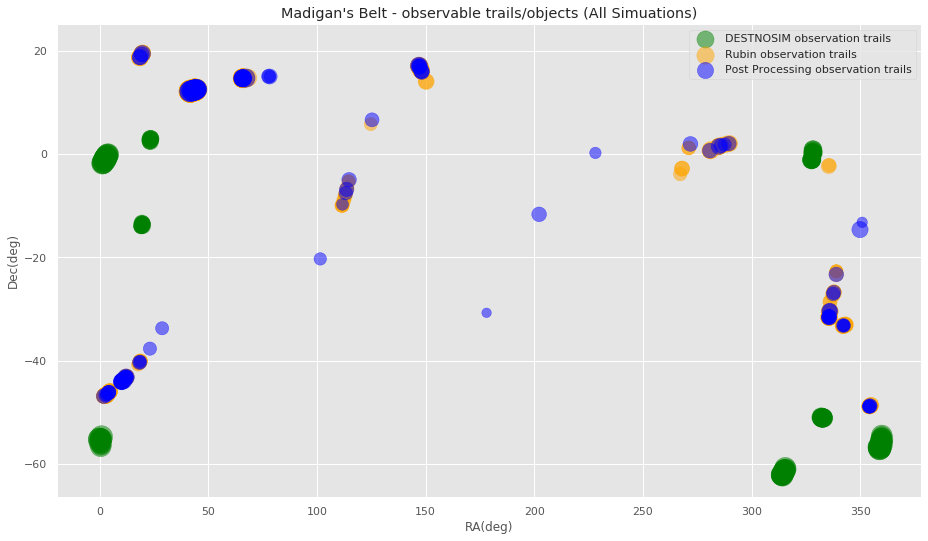

In [16]:
#plt.style.use('ggplot')

fig, ax = plt.subplots(1,1)
fig.set_size_inches(12.8,7.2)
fig.tight_layout() 

#size = ((26 - true_detect['MAG']))*100
#size_drop = ((26 - true_detect_drop['MAG']))*100
ax.set_xlabel('RA(deg)')
ax.set_ylabel('Dec(deg)')

ax.set_title("Madigan's Belt - observable trails/objects (All Simuations)")

ax.scatter(des['RA'], des['DEC'], s=size_des, c='green', label = 'DESTNOSIM observation trails', alpha = .5)
ax.scatter(rubin['ra'], rubin['dec'], s=size_rubin, c='orange', label = 'Rubin observation trails', alpha = .5)
ax.scatter(oifpp['AstRA(deg)'], oifpp['AstDec(deg)'], s=size_oifpp, c='blue', label = 'Post Processing observation trails', alpha = .5)

plt.legend()

plt.savefig('all_obs_obj_trails.png', bbox_inches='tight')